In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib.colors import ListedColormap

sns.set_theme(style="whitegrid")
Prussian = '#094F9E'
MaximumRed = '#D71723'

In [2]:
data = pd.read_csv('2025032716040725_100_SystemData.csv')
n= 100
print(data['VehicleDensity'].max())
print(data['Day'].max())

0.3334
4


/tmp/ipykernel_70235/1683366007.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_day['flux'] = data_day['AverageSpeed'] * data_day['VehicleDensity']
/tmp/ipykernel_70235/1683366007.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_day['TimeOfDay_hours'] = data_day['TimeOfDay'] / 2400
/tmp/ipykernel_70235/1683366007.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the d

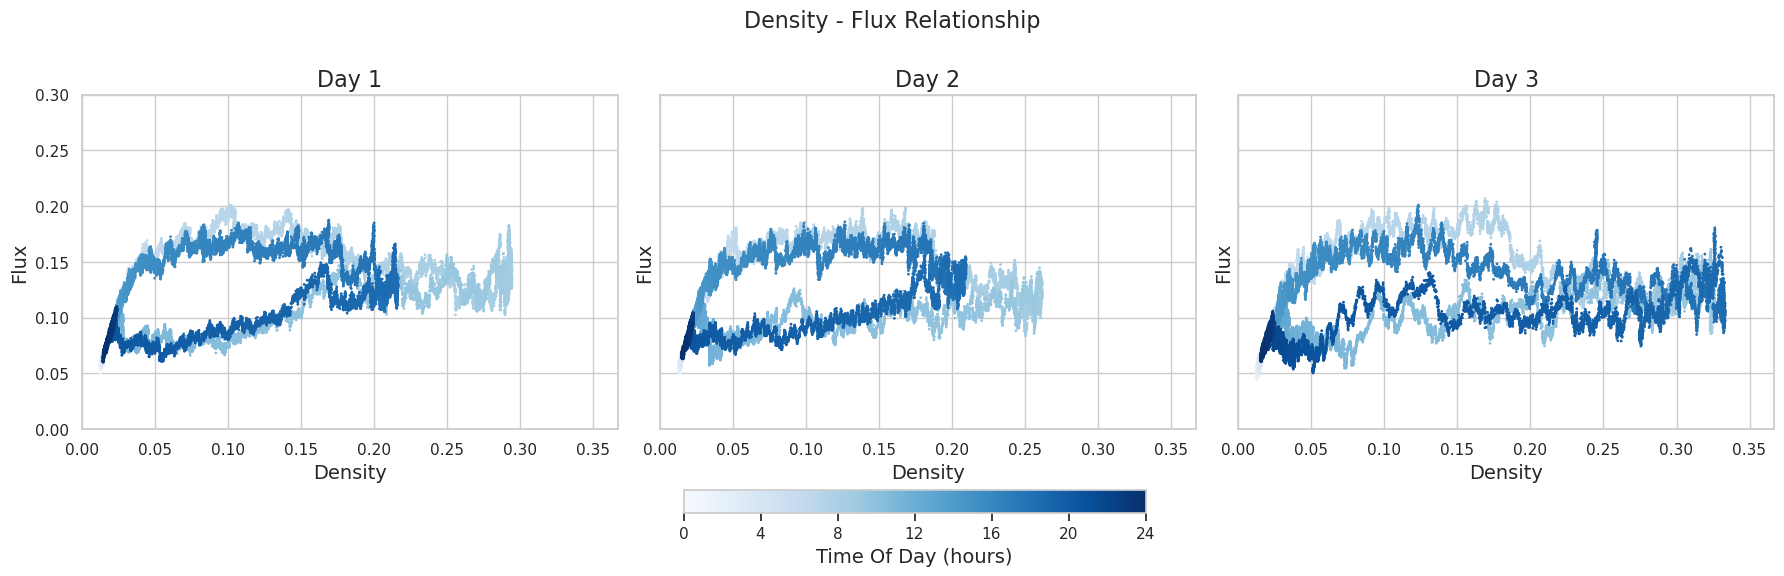

In [9]:
days = [1,2,3]
data_subset = data[data['Day'].isin(days)]

fig, axes = plt.subplots(1, 3, figsize=(18, 6), sharex=True, sharey=True)
cmap = plt.get_cmap('Blues')

for i, day in enumerate(days):
    data_day = data_subset[data_subset['Day'] == day]
    data_day['flux'] = data_day['AverageSpeed'] * data_day['VehicleDensity']
    
    # Convert TimeOfDay to hours
    data_day['TimeOfDay_hours'] = data_day['TimeOfDay'] / 2400
    
    sc = axes[i].scatter(
        data_day['VehicleDensity'],
        data_day['flux'],
        c=data_day['TimeOfDay_hours'],
        cmap=cmap,
        norm=plt.Normalize(0, 24),
        s=1
    )
    axes[i].set_title(f'Day {day}', fontsize=16)
    axes[i].set_xlabel('Density', fontsize=14)
    axes[i].set_ylabel('Flux', fontsize=14)
    axes[i].set_xlim(0, data['VehicleDensity'].max()*1.1)
    axes[i].set_ylim(0, 0.30)

# Update colorbar label
cbar = fig.colorbar(sc, ax=axes, orientation='horizontal', fraction=0.05, pad=0.2)
cbar.set_label('Time Of Day (hours)', fontsize=14)
cbar.set_ticks(np.arange(0, 25, 4))

plt.suptitle('Density - Flux Relationship', fontsize=16, y=0.95)
plt.tight_layout(rect=[0, 0.2, 1, 0.95])
plt.subplots_adjust(bottom=0.25)
plt.savefig('../pics/Density_Flux.png')
plt.show()

/tmp/ipykernel_70235/2940130427.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_day['flux'] = data_day['AverageSpeed'] * data_day['VehicleDensity']
/tmp/ipykernel_70235/2940130427.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_day['TimeOfDay_hours'] = data_day['TimeOfDay'] / 2400
/tmp/ipykernel_70235/2940130427.py:13: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  sc = axes[i].scatter(
/tmp/ipykernel_70235/2940130427.py:8: SettingWithCopyWarni

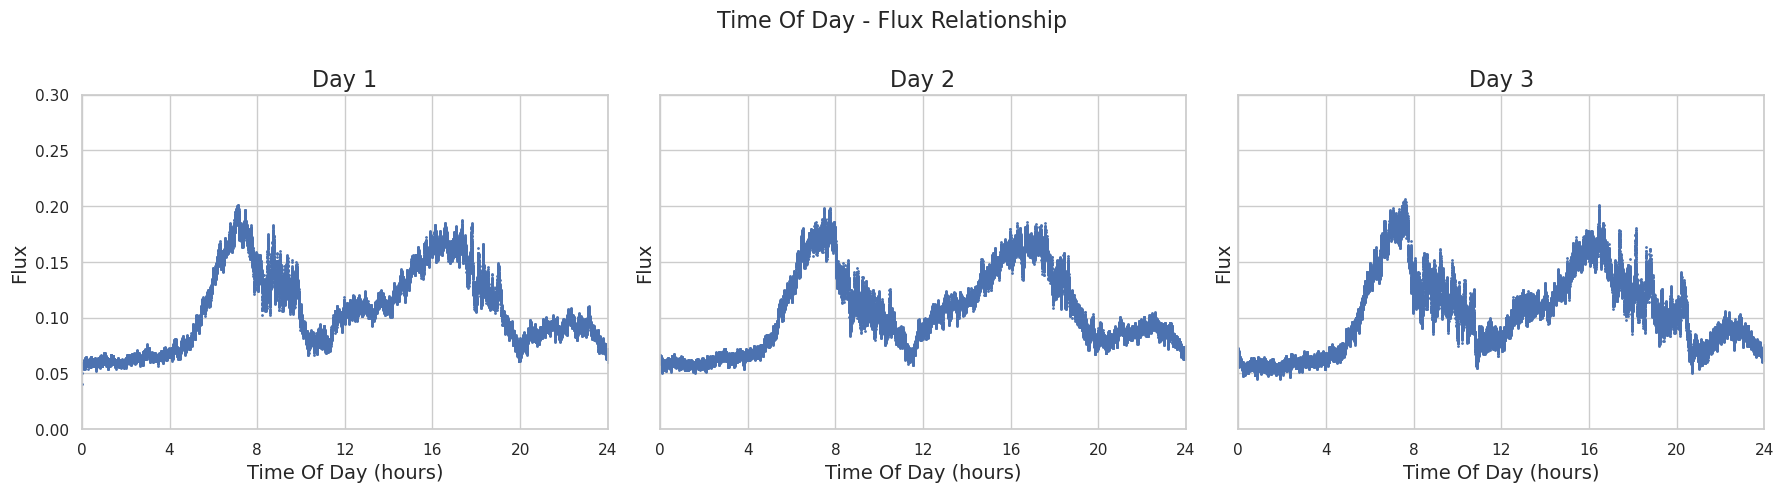

In [10]:
days = [1,2,3]
data_subset = data[data['Day'].isin(days)]

fig, axes = plt.subplots(1, 3, figsize=(18, 6), sharex=True, sharey=True)

for i, day in enumerate(days):
    data_day = data_subset[data_subset['Day'] == day]
    data_day['flux'] = data_day['AverageSpeed'] * data_day['VehicleDensity']
    
    # 将 TimeOfDay 转换为小时
    data_day['TimeOfDay_hours'] = data_day['TimeOfDay'] / 2400
    
    sc = axes[i].scatter(
        data_day['TimeOfDay_hours'],       # X 轴为 TimeOfDay_hours
        data_day['flux'],                  # Y 轴为 flux
        cmap='Blues',
        s=1
    )
    axes[i].set_title(f'Day {day}', fontsize=16)
    axes[i].set_xlabel('Time Of Day (hours)', fontsize=14)
    axes[i].set_ylabel('Flux', fontsize=14)
    axes[i].set_xlim(0, 24)
    axes[i].set_xticks(np.arange(0, 25, 4))              
    axes[i].set_ylim(0, 0.3)

plt.suptitle('Time Of Day - Flux Relationship', fontsize=16, y=0.95)
plt.tight_layout(rect=[0, 0.2, 1, 0.95])
plt.subplots_adjust(bottom=0.25)
plt.savefig('../pics/TimeOfDay_Flux.png')
plt.show()

/tmp/ipykernel_70235/1483771933.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_day['TimeOfDay_hours'] = data_day['TimeOfDay'] / 2400
/tmp/ipykernel_70235/1483771933.py:12: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  sc = axes[i].scatter(


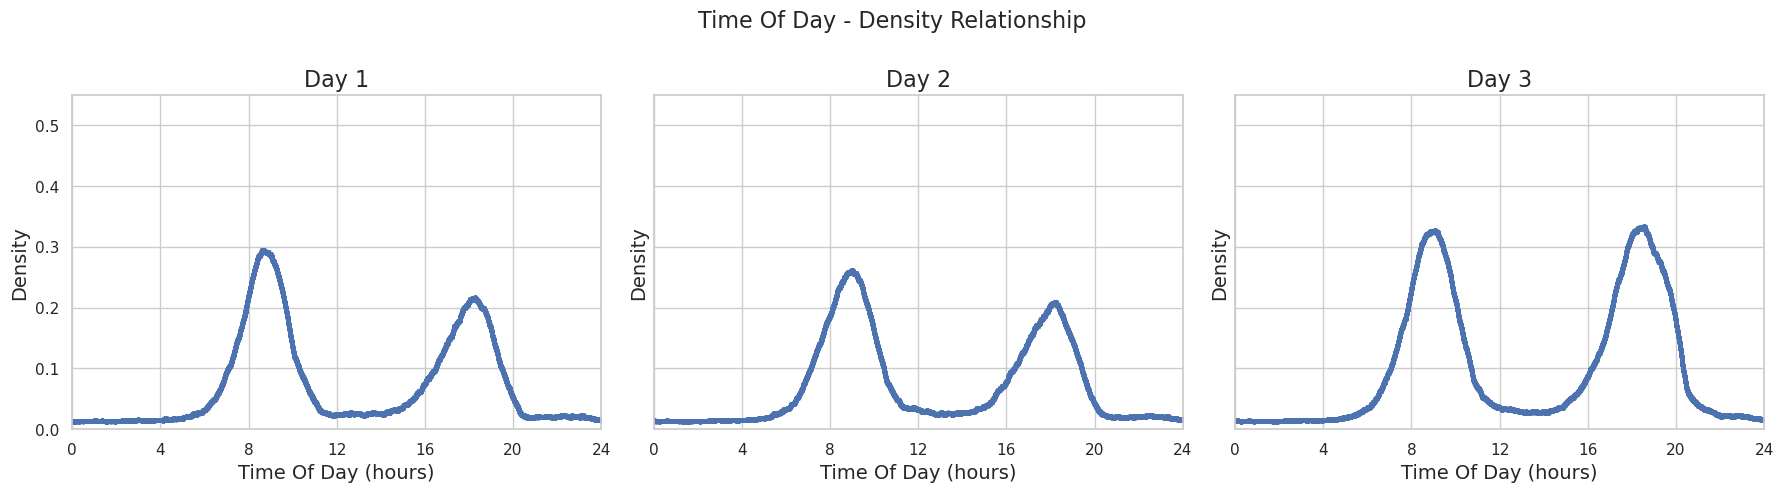

In [11]:
days = [1,2,3]
data_subset = data[data['Day'].isin(days)]

fig, axes = plt.subplots(1, 3, figsize=(18, 6), sharex=True, sharey=True)

for i, day in enumerate(days):
    data_day = data_subset[data_subset['Day'] == day]
    
    # 将 TimeOfDay 转换为小时
    data_day['TimeOfDay_hours'] = data_day['TimeOfDay'] / 2400
    
    sc = axes[i].scatter(
        data_day['TimeOfDay_hours'],       # X 轴为 TimeOfDay_hours
        data_day['VehicleDensity'],                  # Y 轴为 flux
        cmap='Blues',
        s=5
    )
    axes[i].set_title(f'Day {day}', fontsize=16)
    axes[i].set_xlabel('Time Of Day (hours)', fontsize=14)
    axes[i].set_ylabel('Density', fontsize=14)
    axes[i].set_xlim(0, 24)
    axes[i].set_xticks(np.arange(0, 25, 4))              
    axes[i].set_ylim(0, 0.55)

plt.suptitle('Time Of Day - Density Relationship', fontsize=16, y=0.95)
plt.tight_layout(rect=[0, 0.2, 1, 0.95])
plt.subplots_adjust(bottom=0.25)
plt.savefig('../pics/TimeOfDay_Density.png')
plt.show()

/tmp/ipykernel_70235/1273887548.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_day['TimeOfDay_hours'] = data_day['TimeOfDay'] / 2400
/tmp/ipykernel_70235/1273887548.py:12: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  sc = axes[i].scatter(


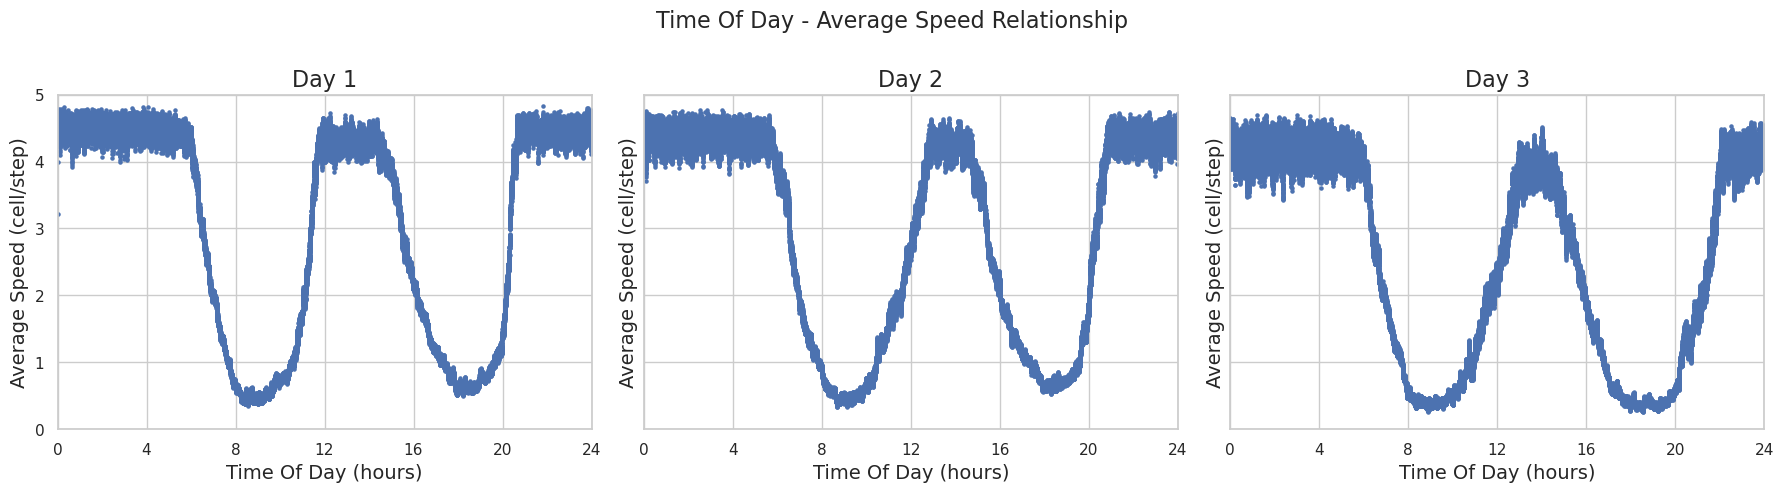

In [12]:
days = [1,2,3]
data_subset = data[data['Day'].isin(days)]

fig, axes = plt.subplots(1, 3, figsize=(18, 6), sharex=True, sharey=True)

for i, day in enumerate(days):
    data_day = data_subset[data_subset['Day'] == day]
    
    # 将 TimeOfDay 转换为小时
    data_day['TimeOfDay_hours'] = data_day['TimeOfDay'] / 2400
    
    sc = axes[i].scatter(
        data_day['TimeOfDay_hours'],       # X 轴为 TimeOfDay_hours
        data_day['AverageSpeed'],                  # Y 轴为 flux
        cmap='Blues',
        s=5
    )
    axes[i].set_title(f'Day {day}', fontsize=16)
    axes[i].set_xlabel('Time Of Day (hours)', fontsize=14)
    axes[i].set_ylabel('Average Speed (cell/step)', fontsize=14)
    axes[i].set_xlim(0, 24)
    axes[i].set_xticks(np.arange(0, 25, 4))              
    axes[i].set_ylim(0, 5)

plt.suptitle('Time Of Day - Average Speed Relationship', fontsize=16, y=0.95)
plt.tight_layout(rect=[0, 0.2, 1, 0.95])
plt.subplots_adjust(bottom=0.25)
plt.savefig('../pics/TimeOfDay_AverageSpeed.png')
plt.show()

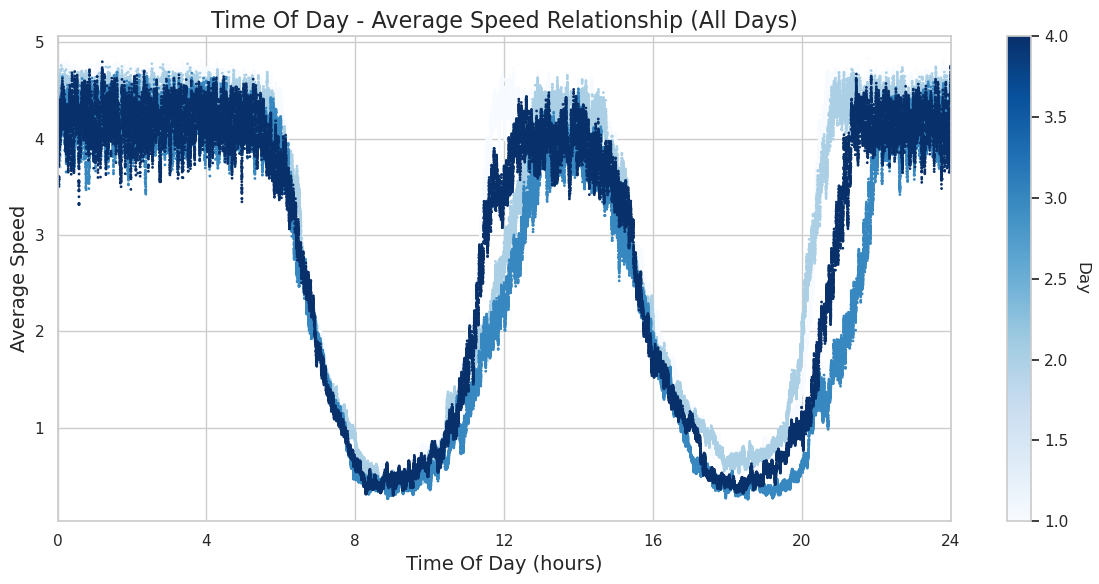

In [13]:
data['TimeOfDay_hours'] = data['TimeOfDay'] / 2400

# 绘制散点图，用天数表示颜色
plt.figure(figsize=(12, 6))
scatter = plt.scatter(
    data['TimeOfDay_hours'],
    data['AverageSpeed'],
    c=data['Day'],
    cmap='Blues',
    s=1
)

plt.xlabel('Time Of Day (hours)', fontsize=14)
plt.ylabel('Average Speed', fontsize=14)
plt.title('Time Of Day - Average Speed Relationship (All Days)', fontsize=16)
plt.xlim(0, 24)
plt.xticks(np.arange(0, 25, 4))

# 添加颜色条
cbar = plt.colorbar(scatter)
cbar.set_label('Day', rotation=270, labelpad=15)

plt.tight_layout()
plt.savefig('../pics/TimeOfDay_AverageSpeed_AllDays.png')
plt.show()

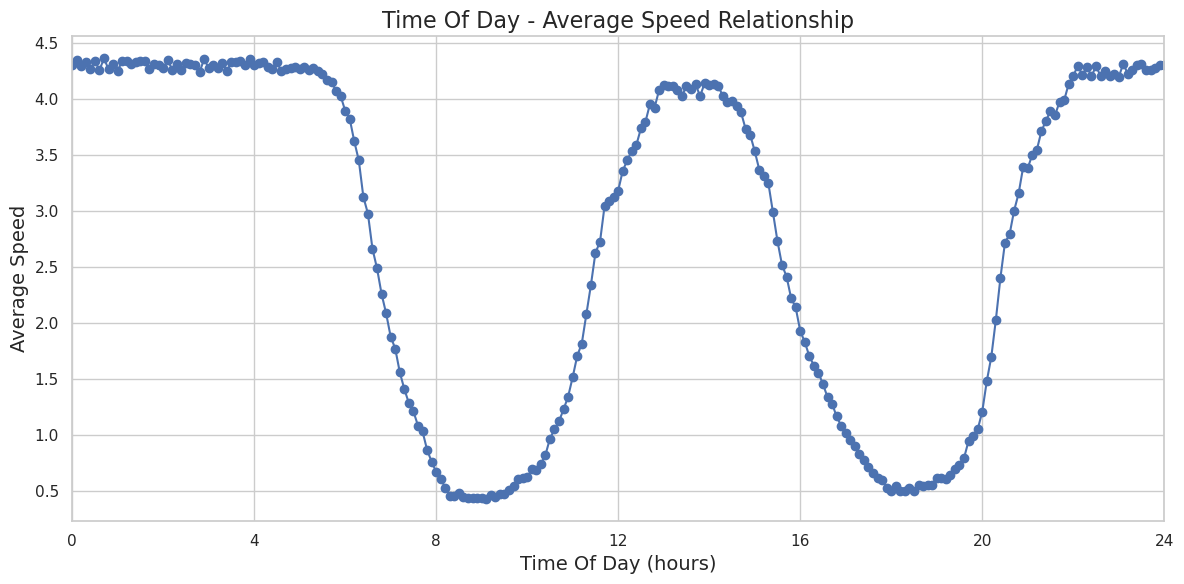

In [14]:
# 计算每个时间点的平均速度
data['TimeOfDay_hours'] = data['TimeOfDay'] / 2400
data['TimeOfDay_bin'] = data['TimeOfDay_hours'].round(1)
avg_speed = data.groupby('TimeOfDay_bin')['AverageSpeed'].mean().reset_index()

# 绘制平均后的图形
plt.figure(figsize=(12, 6))
plt.plot(avg_speed['TimeOfDay_bin'], avg_speed['AverageSpeed'], linestyle='-', marker='o')

plt.xlabel('Time Of Day (hours)', fontsize=14)
plt.ylabel('Average Speed', fontsize=14)
plt.title('Time Of Day - Average Speed Relationship', fontsize=16)
plt.xlim(0, 24)
plt.xticks(np.arange(0, 25, 4))

plt.tight_layout()
plt.show()